# Tóm tắt

### Các thư viện thường sử dụng khi làm việc với ảnh

In [48]:
import cv2                          # thao tác với ảnh
import numpy as np                  # thao tác với ma trận
import matplotlib.pyplot as plt     # hiển thị ảnh
from IPython.display import Image   # hiển thị ảnh

### Các thao tác với ảnh

#### Đọc ảnh

* Lưu ý kết quả trả về là một ma trận (b, g, r)

In [49]:
# Đọc ảnh
image_bgr = cv2.imread("images/coca-cola-logo.png")

#### Hiển thị ảnh

* Lưu ý `matplot` hiển thị ảnh dưới dạng (r, g, b)

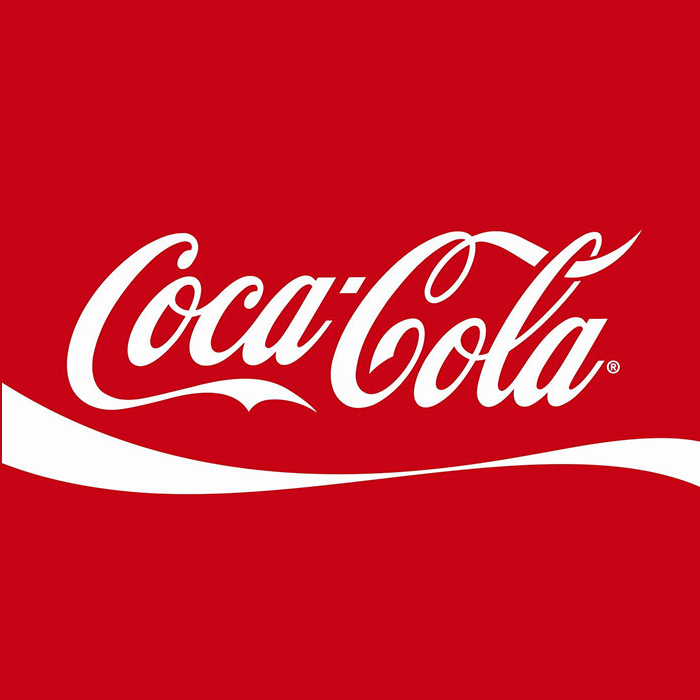

In [50]:
# Hiển thị trực tiếp
Image(filename="images/coca-cola-logo.png")

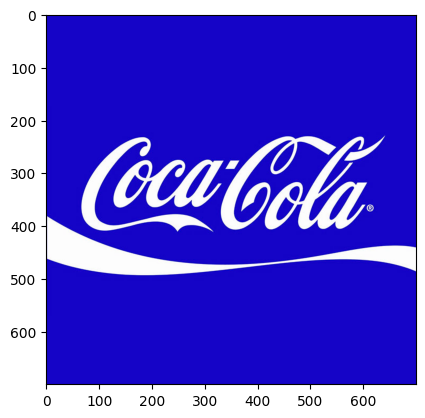

In [51]:
# Hiển thị bằng thông qua matplot
plt.imshow(image_bgr)

#### Thông số của ảnh

In [52]:
print(image_bgr.shape)
print(f"Chiều dài: {image_bgr.shape[0]}")
print(f"Chiều cao: {image_bgr.shape[1]}")
print(f"Chiều sâu: {image_bgr.shape[2]}")

(700, 700, 3)
Chiều dài: 700
Chiều cao: 700
Chiều sâu: 3


#### Chuyển đổi kênh màu

Text(0.5, 1.0, 'RGB')

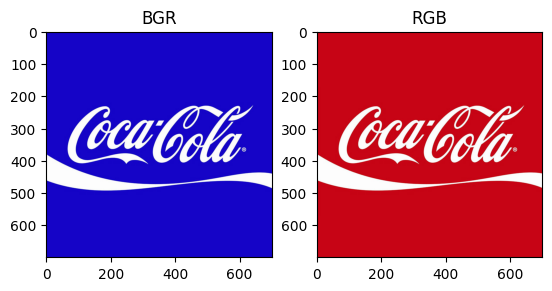

In [53]:
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
plt.subplot(121); plt.imshow(image_bgr); plt.title("BGR")
plt.subplot(122); plt.imshow(image_rgb); plt.title("RGB")

### Chia kênh & Hợp kênh

Text(0.5, 1.0, 'RGB')

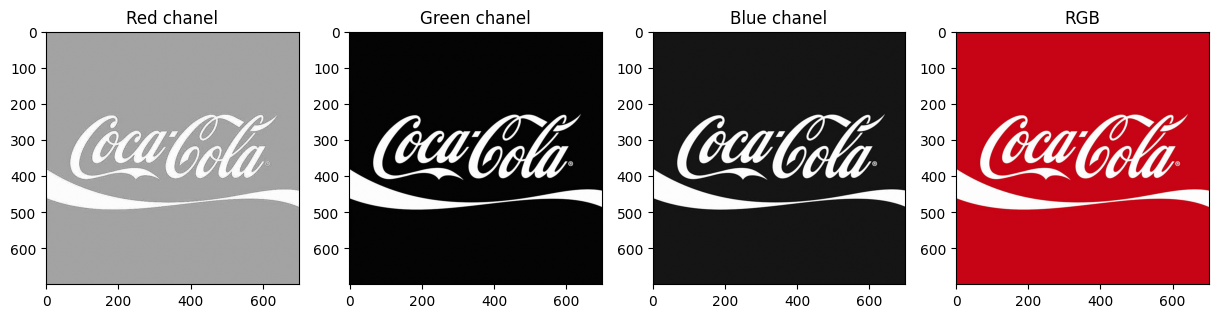

In [54]:
# Chia kênh
b, g, r = cv2.split(image_bgr)

# Hợp kênh
image_rgb = cv2.merge((r, g, b))

plt.figure(figsize=[15, 5])
plt.subplot(141); plt.imshow(r, cmap="gray"); plt.title("Red chanel")
plt.subplot(142); plt.imshow(g, cmap="gray"); plt.title("Green chanel")
plt.subplot(143); plt.imshow(b, cmap="gray"); plt.title("Blue chanel")
plt.subplot(144); plt.imshow(image_rgb);      plt.title("RGB")

#### Chú thích ảnh

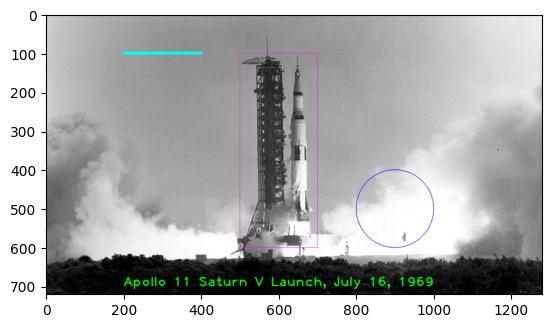

In [55]:
apollo_bgr = cv2.imread("images/Apollo_11_Launch.jpg", cv2.IMREAD_COLOR)
apollo     = cv2.cvtColor(apollo_bgr, cv2.COLOR_BGR2RGB)
# Vẽ một đường thẳng
cv2.line(apollo, (200, 100), (400, 100), (0, 255, 255), thickness=5, lineType=cv2.LINE_AA)

# Vẽ đường tròn
cv2.circle(apollo, (900,500), 100, (0, 0, 255), thickness=0, lineType=cv2.LINE_AA)

# Vẽ hình chữ nhật
cv2.rectangle(apollo, (500, 100), (700, 600), (255, 0, 255), thickness=1, lineType=cv2.LINE_8)

# Thêm văn bản cho ảnh
text = "Apollo 11 Saturn V Launch, July 16, 1969"
fontScale = 2.3
fontFace = cv2.FONT_HERSHEY_PLAIN
fontColor = (0, 255, 0)
fontThickness = 2
cv2.putText(apollo, text, (200, 700), fontFace, fontScale, fontColor, fontThickness, cv2.LINE_AA);

plt.imshow(apollo)

### Các phép toán cơ bản với ảnh

Text(0.5, 1.0, 'Multiplied')

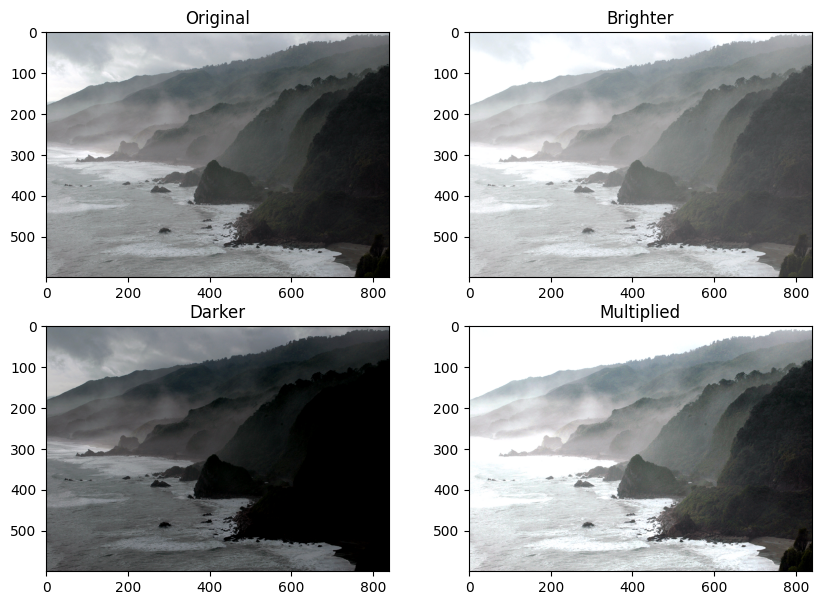

In [59]:
src = cv2.cvtColor(cv2.imread("images/New_Zealand_Coast.jpg", cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
max = np.ones((src.shape), dtype=np.uint8) * 55

# Phép cộng ảnh : Cộng giá trị của 2 phần tử tương ứng, nếu vượt quá 255 thì tự động làm tròn xuống
add = np.uint8(cv2.add(src, max))

# Phép trừ ảnh : Trừ giá trị của 2 phần tử tương ứng, nếu nhỏ hơn 0 thì tự động làm tròn lên
sub = np.uint8(cv2.subtract(src, max))

# Phép nhân ảnh : Nhân giá trị của 2 phần tử tương ứng, không tự động làm tròn khi vượt quá 255, cần phải tự làm tròn bằng hàm np.clip
multiplier = 1.5
mul = np.clip(np.uint8(cv2.multiply(src, multiplier)),0,255)

plt.figure(figsize=[10, 7])
plt.subplot(221); plt.imshow(src); plt.title("Original")
plt.subplot(222); plt.imshow(add); plt.title("Brighter")
plt.subplot(223); plt.imshow(sub); plt.title("Darker")
plt.subplot(224); plt.imshow(mul); plt.title("Multiplied")

#### Bitwise

Text(0.5, 1.0, 'Bitwise NOT')

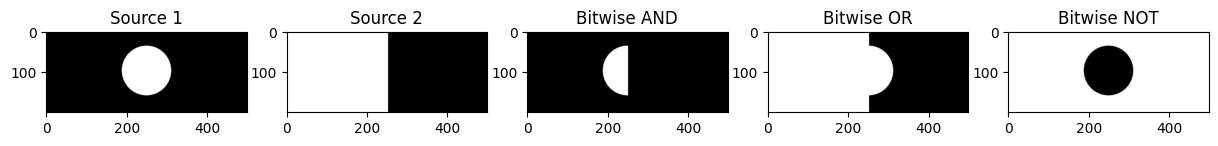

In [57]:
src1 = cv2.imread("images/circle.jpg", cv2.IMREAD_GRAYSCALE)
src2 = cv2.imread("images/rectangle.jpg", cv2.IMREAD_GRAYSCALE)
# bitwise AND : Lấy giá trị của 2 phần tử tương ứng, nếu cả 2 đều là 1 thì kết quả là 1, ngược lại là 0
img_and = cv2.bitwise_and(src1, src2)

# bitwise OR : Lấy giá trị của 2 phần tử tương ứng, nếu cả 2 đều là 0 thì kết quả là 0, ngược lại là 1
img_or = cv2.bitwise_or(src1, src2)

# bitwise NOT : Lấy giá trị của 2 phần tử tương ứng, nếu là 0 thì kết quả là 1, ngược lại là 0
img_not = cv2.bitwise_not(src1)

plt.figure(figsize=[15, 5])
plt.subplot(151); plt.imshow(src1, cmap="gray"); plt.title("Source 1")
plt.subplot(152); plt.imshow(src2, cmap="gray"); plt.title("Source 2")
plt.subplot(153); plt.imshow(img_and, cmap="gray"); plt.title("Bitwise AND")
plt.subplot(154); plt.imshow(img_or, cmap="gray"); plt.title("Bitwise OR")
plt.subplot(155); plt.imshow(img_not, cmap="gray"); plt.title("Bitwise NOT")

### Thao tác hình ảnh cơ bản

Text(0.5, 1.0, 'Resize')

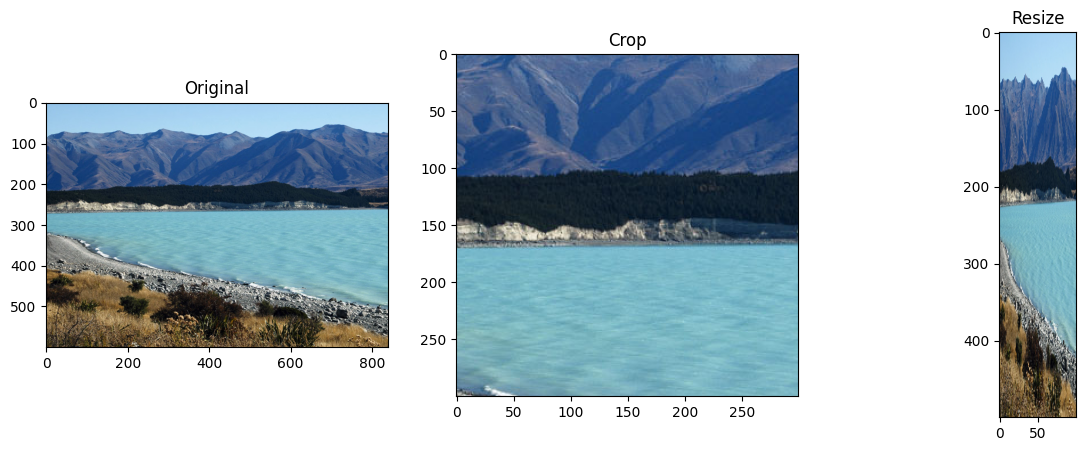

In [64]:
src = cv2.cvtColor(cv2.imread("images/New_Zealand_Lake.jpg", cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)

# Cắt ảnh
crop = src[100:400, 200:500]

# Thay đổi kích thước ảnh
resize = cv2.resize(src, (100, 500), interpolation=cv2.INTER_LINEAR)

plt.figure(figsize=[15, 5])
plt.subplot(131); plt.imshow(src); plt.title("Original")
plt.subplot(132); plt.imshow(crop); plt.title("Crop")
plt.subplot(133); plt.imshow(resize); plt.title("Resize")
